In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron

### Which model is best using Cross Validation?
## KNN imputation of Age

In [34]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
imputer = KNNImputer()

In [40]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("train.csv")
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Survived"), df["Survived"], test_size = 0.33, random_state=1)

X_train["CabinNull?"] = X_train.Cabin.isnull()
X_test["CabinNull?"] = X_test.Cabin.isnull()
X_train["Total_Fam"] = X_train.Parch + X_train.SibSp
X_test["Total_Fam"] = X_test.Parch + X_test.SibSp
X_train['Age_bin'] = pd.cut(X_train['Age'], bins=[0,18,65,np.percentile(X_train.Age,100)], labels=["Youth","Adult", "Elderly"])
X_test['Age_bin'] = pd.cut(X_test['Age'], bins=[0,18,65,np.percentile(X_test.Age,100)], labels=["Youth","Adult", "Elderly"])

#Drop the unique columns that won't help our model. Both in the test and train datasets
X_train.drop(columns = ["Name","Ticket", "PassengerId","Cabin"], inplace = True)
X_test.drop(columns = ["Name","Ticket", "PassengerId","Cabin"], inplace = True)

#Impute the numerical variables with mean
X_train["Fare"] = X_train["Fare"].replace(np.NaN, X_train["Fare"].mean())
X_test["Fare"] = X_test["Fare"].replace(np.NaN, X_train["Fare"].mean())


#Binning - Fare
X_train['Fare_bin'] = pd.cut(X_train['Fare'], bins=[np.percentile(X_train.Fare,0),np.percentile(X_train.Fare,25),
                                                    np.percentile(X_train.Fare,50),
                                                    np.percentile(X_train.Fare,75),
                                                    np.percentile(X_train.Fare,100)], labels=["Lowest","Low-to-Mid", "Mid", "High"])
X_test['Fare_bin'] = pd.cut(X_test['Fare'], bins=[np.percentile(X_train.Fare,0),np.percentile(X_train.Fare,25),
                                                   np.percentile(X_train.Fare,50),
                                                   np.percentile(X_train.Fare,75),
                                                   np.percentile(X_train.Fare,100)], labels=["Lowest", "Low-to-Mid", "Mid", "High"])



#Change Passenger class to a string variable instead of numerical
X_train.Pclass = X_train.Pclass.astype(str)
X_test.Pclass = X_test.Pclass.astype(str)

#Impute the Categorical variables
#X_train.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])
#X_test.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])

X_train.Embarked = X_train.Embarked.fillna(X_train['Embarked'].value_counts().index[0])
X_test.Embarked = X_test.Embarked.fillna(X_train['Embarked'].value_counts().index[0])

X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [41]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [42]:
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns = X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns = X_test.columns)

In [43]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=1000)
scores=cross_val_score(model,X_train,y_train,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.72067039 0.76536313 0.73743017 0.82122905 0.76536313 0.70949721
 0.76536313 0.74860335 0.78212291 0.7150838  0.79888268 0.80446927
 0.77653631 0.73743017 0.75418994 0.74860335 0.79329609 0.72625698
 0.7877095  0.73184358 0.74860335 0.75977654 0.73184358 0.73184358
 0.76536313 0.77653631 0.80446927 0.74860335 0.80446927 0.70949721
 0.74301676 0.79329609 0.75418994 0.7150838  0.79888268 0.75418994
 0.74860335 0.7150838  0.74860335 0.80446927 0.73743017 0.7877095
 0.79888268 0.77653631 0.70949721 0.75977654 0.77653631 0.75977654
 0.83240223 0.76536313 0.74860335 0.7877095  0.73184358 0.78212291
 0.75418994 0.76536313 0.76536313 0.77094972 0.75977654 0.77653631
 0.75977654 0.75977654 0.77094972 0.74860335 0.74301676 0.7877095
 0.77653631 0.7877095  0.77094972 0.79888268 0.7877095  0.77094972
 0.74860335 0.75977654 0.81005587 0.73743017 0.7877095  0.79888268
 0.77653631 0.76536313 0.73743017 0.76536313 0.76536313 0.73743017
 0.77653631 0.81564246 0.77653631 0.74

## Basic Model with dropping Age

In [32]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("train.csv")
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Survived"), df["Survived"], test_size = 0.33)

X_train["CabinNull?"] = X_train.Cabin.isnull()
X_test["CabinNull?"] = X_test.Cabin.isnull()
X_train["Total_Fam"] = X_train.Parch + X_train.SibSp
X_test["Total_Fam"] = X_test.Parch + X_test.SibSp
X_train['Age_bin'] = pd.cut(X_train['Age'], bins=[0,18,65,np.percentile(X_train.Age,100)], labels=["Youth","Adult", "Elderly"])
X_test['Age_bin'] = pd.cut(X_test['Age'], bins=[0,18,65,np.percentile(X_test.Age,100)], labels=["Youth","Adult", "Elderly"])


#Drop the unique columns that won't help our model. Both in the test and train datasets
X_train.drop(columns = ["Name","Ticket", "PassengerId","Cabin","Age"], inplace = True)
X_test.drop(columns = ["Name","Ticket", "PassengerId","Cabin","Age"], inplace = True)

#Impute the numerical variables with mean
X_train["Fare"] = X_train["Fare"].replace(np.NaN, X_train["Fare"].mean())
X_test["Fare"] = X_test["Fare"].replace(np.NaN, X_train["Fare"].mean())

#Binning - Fare
X_train['Fare_bin'] = pd.cut(X_train['Fare'], bins=[np.percentile(X_train.Fare,0),np.percentile(X_train.Fare,25),
                                                    np.percentile(X_train.Fare,50),
                                                    np.percentile(X_train.Fare,75),
                                                    np.percentile(X_train.Fare,100)], labels=["Lowest","Low-to-Mid", "Mid", "High"])
X_test['Fare_bin'] = pd.cut(X_test['Fare'], bins=[np.percentile(X_train.Fare,0),np.percentile(X_train.Fare,25),
                                                   np.percentile(X_train.Fare,50),
                                                   np.percentile(X_train.Fare,75),
                                                   np.percentile(X_train.Fare,100)], labels=["Lowest", "Low-to-Mid", "Mid", "High"])


#Change Passenger class to a string variable instead of numerical
X_train.Pclass = X_train.Pclass.astype(str)
X_test.Pclass = X_test.Pclass.astype(str)

#Impute the Categorical variables
#X_train.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])
#X_test.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])

X_train.Embarked = X_train.Embarked.fillna(X_train['Embarked'].value_counts().index[0])
X_test.Embarked = X_test.Embarked.fillna(X_train['Embarked'].value_counts().index[0])

X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [33]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=1000)
scores=cross_val_score(model,X_train,y_train,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.73184358 0.74860335 0.77094972 0.73743017 0.80446927 0.77094972
 0.73184358 0.77094972 0.72067039 0.70949721 0.79888268 0.75418994
 0.70391061 0.74860335 0.73184358 0.74860335 0.73184358 0.70949721
 0.74860335 0.70949721 0.75418994 0.75977654 0.73743017 0.77653631
 0.81564246 0.74860335 0.76536313 0.70949721 0.75977654 0.79329609
 0.74301676 0.77653631 0.72625698 0.73743017 0.74301676 0.75977654
 0.73743017 0.81564246 0.76536313 0.7150838  0.81005587 0.72625698
 0.74301676 0.80446927 0.73743017 0.75977654 0.73184358 0.75977654
 0.64804469 0.77653631 0.7877095  0.75977654 0.76536313 0.77653631
 0.70949721 0.73184358 0.78212291 0.74301676 0.7150838  0.69273743
 0.77094972 0.70949721 0.77653631 0.72625698 0.70949721 0.72625698
 0.70949721 0.73743017 0.73184358 0.73743017 0.74301676 0.72625698
 0.79888268 0.81564246 0.75418994 0.68715084 0.74301676 0.73184358
 0.79329609 0.68156425 0.75418994 0.79888268 0.75418994 0.74860335
 0.82122905 0.77653631 0.73743017 0.

## MICE model

In [45]:
from sklearn.model_selection import train_test_split
df=pd.read_csv("train.csv")
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="Survived"), df["Survived"], test_size = 0.33, random_state=1)

#Drop the unique columns that won't help our model. Both in the test and train datasets
X_train.drop(columns = ["Name","Ticket", "PassengerId","Cabin"], inplace = True)
X_test.drop(columns = ["Name","Ticket", "PassengerId","Cabin"], inplace = True)

#Impute the numerical variables with mean
X_train["Fare"] = X_train["Fare"].replace(np.NaN, X_train["Fare"].mean())
X_test["Fare"] = X_test["Fare"].replace(np.NaN, X_train["Fare"].mean())

#Change Passenger class to a string variable instead of numerical
X_train.Pclass = X_train.Pclass.astype(str)
X_test.Pclass = X_test.Pclass.astype(str)

#Impute the Categorical variables
#X_train.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])
#X_test.Cabin = X_train.Cabin.fillna(X_train['Cabin'].value_counts().index[0])

X_train.Embarked = X_train.Embarked.fillna(X_train['Embarked'].value_counts().index[0])
X_test.Embarked = X_test.Embarked.fillna(X_train['Embarked'].value_counts().index[0])

X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman')
X_train=pd.DataFrame(imp.fit_transform(X_train),columns = X_train.columns)
X_test=pd.DataFrame(imp.transform(X_test),columns = X_test.columns)

[IterativeImputer] Completing matrix with shape (596, 9)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.01
[IterativeImputer] Change: 40.35736906783237, scaled tolerance: 0.5123292 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.01
[IterativeImputer] Change: 0.0, scaled tolerance: 0.5123292 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (295, 9)
[IterativeImputer] Ending imputation round 1/2, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/2, elapsed time 0.00


In [47]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=1000)
scores=cross_val_score(model,X_train,y_train,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.78212291 0.82681564 0.73743017 0.79329609 0.76536313 0.76536313
 0.77094972 0.80446927 0.79329609 0.76536313 0.7877095  0.80446927
 0.7877095  0.81005587 0.75977654 0.75418994 0.8547486  0.73184358
 0.76536313 0.80446927 0.81564246 0.73743017 0.76536313 0.77653631
 0.78212291 0.77653631 0.73743017 0.82681564 0.77094972 0.74301676
 0.79888268 0.81005587 0.73184358 0.81005587 0.73184358 0.73184358
 0.78212291 0.77653631 0.77653631 0.80446927 0.74301676 0.7877095
 0.76536313 0.75977654 0.82681564 0.76536313 0.82122905 0.7877095
 0.81005587 0.77653631 0.75977654 0.75977654 0.73743017 0.78212291
 0.7877095  0.73184358 0.80446927 0.76536313 0.78212291 0.79329609
 0.79888268 0.7877095  0.81005587 0.7150838  0.79329609 0.77094972
 0.75977654 0.79329609 0.76536313 0.77094972 0.75418994 0.79888268
 0.82122905 0.76536313 0.80446927 0.82681564 0.75977654 0.78212291
 0.84916201 0.77653631 0.78212291 0.78212291 0.77094972 0.74301676
 0.82122905 0.82681564 0.77094972 0.74

# Feature Selection
## Recursive Feature Elimination
It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [4]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
rfe = RFECV(estimator=DecisionTreeClassifier())
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False  True False False False False
 False False False]
[ 4  8  1  3  1 12  2  1  9  6  5 10  7 11 13]


In [5]:
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected False, Rank: 8.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 3.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 12.000
Column: 6, Selected False, Rank: 2.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 9.000
Column: 9, Selected False, Rank: 6.000
Column: 10, Selected False, Rank: 5.000
Column: 11, Selected False, Rank: 10.000
Column: 12, Selected False, Rank: 7.000
Column: 13, Selected False, Rank: 11.000
Column: 14, Selected False, Rank: 13.000


In [6]:
X_train = pd.DataFrame(rfe.fit_transform(X_train,y_train), columns = X_train.loc[:,list(rfe.support_)].columns)

In [7]:
X_test = pd.DataFrame(rfe.transform(X_test), columns = X_test.loc[:,list(rfe.support_)].columns)

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

In [10]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7966101694915254

In [11]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=10000)
scores=cross_val_score(model,X_train,y_train,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.81564246 0.7877095  0.81564246 ... 0.81005587 0.74860335 0.7877095 ]
Average Cross Validation score :0.7937938547486034


## Feature Importance
Methods that use ensembles of decision trees (like Random Forest or Extra Trees) can also compute the relative importance of each attribute. These importance values can be used to inform a feature selection process.

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[0.25839481 0.04684079 0.04997717 0.19734093 0.01893844 0.08531872
 0.30564464 0.00880358 0.02874093]


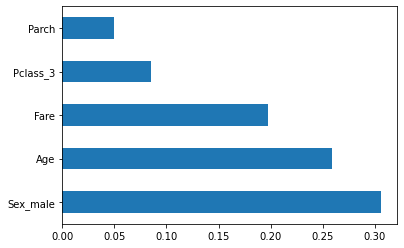

In [50]:
feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Univariate Selection

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures= SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ["Specs","Score"]
featureScores.sort_values(by = ["Score"], ascending = False)

ValueError: Input X must be non-negative.

## Mutual Information

In [53]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X_train,y_train)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_train.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [54]:
mi_scores

Sex_male      0.180431
Fare          0.113941
Age           0.083274
Pclass_2      0.051078
Parch         0.027082
Pclass_3      0.022721
SibSp         0.004616
Embarked_Q    0.000000
Embarked_S    0.000000
Name: MI Scores, dtype: float64

<Figure size 1200x1000 with 0 Axes>

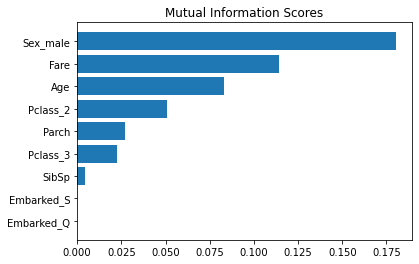

<Figure size 1200x1000 with 0 Axes>

In [55]:
scores = mi_scores.sort_values(ascending=True)
width = np.arange(len(scores))
ticks = list(scores.index)
plt.barh(width, scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")
plt.figure(dpi=100, figsize=(12, 10))

I don't think that feature selection matters as much for the tree methods (decision and random forest) as they have feature selection embedded within it. That's why I didn't see much of a difference in accuracy when I did feature selection to when I didn't. I think that it will matter with other models.

## Model Selection

In [56]:
rfmodel = RandomForestClassifier()
admodel = AdaBoostClassifier()
knmodel = KNeighborsClassifier()
nbmodel = GaussianNB()
svmmodel = svm.SVC()
lrmodel = LogisticRegression()
ldamodel = LinearDiscriminantAnalysis()
pmodel = Perceptron()

In [57]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=1000)
scores=cross_val_score(rfmodel,X_train,y_train,cv=shuffle_split)
#print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

Average Cross Validation score :0.8214078212290503


In [58]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=1000)
scores=cross_val_score(admodel,X_train,y_train,cv=shuffle_split)
#print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

Average Cross Validation score :0.8111452513966481


In [59]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=1000)
scores=cross_val_score(knmodel,X_train,y_train,cv=shuffle_split)
#print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

Average Cross Validation score :0.7016983240223463


In [60]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=1000)
scores=cross_val_score(nbmodel,X_train,y_train,cv=shuffle_split)
#print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

Average Cross Validation score :0.7994581005586592


In [61]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=1000)
scores=cross_val_score(svmmodel,X_train,y_train,cv=shuffle_split)
#print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

Average Cross Validation score :0.6856368715083799


In [62]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=1000)
scores=cross_val_score(lrmodel,X_train,y_train,cv=shuffle_split)
#print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Average Cross Validation score :0.8223575418994414


In [63]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=1000)
scores=cross_val_score(ldamodel,X_train,y_train,cv=shuffle_split)
#print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

Average Cross Validation score :0.8103296089385477


In [64]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=1000)
scores=cross_val_score(pmodel,X_train,y_train,cv=shuffle_split)
#print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

Average Cross Validation score :0.6390670391061454


Best ones that I noticed where Random Forest, Decision Tree, Adaboost, Naive Bayes, and LinearDiscriminantAnalysis

## Hypertuning - Random Forest

Parke - Looking at ways to optimize random forest model

# Setting Up Baseline

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
#dt = DecisionTreeClassifier()

In [85]:
#Determining base accuracy
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7694915254237288

In [97]:
#Use Monte Carlo
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=1000)
scores=cross_val_score(rf,X_train,y_train,cv=shuffle_split)
#print("cross Validation scores:n {}".format(scores))
base_accuracy = scores.mean()
print("Average Cross Validation score :{}".format(base_accuracy))

Average Cross Validation score :0.7857374301675977


# Finding Optimal Parameters

Randomized Search CV

In [67]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [68]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [69]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [70]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': False}

In [73]:
rf_best = RandomForestClassifier(n_estimators = 2000, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto',
    max_depth = 60,
    bootstrap = False)

rf_best.fit(X_train,y_train)
y_pred = rf_best.predict(X_test)
accuracy_score(y_test, y_pred)

0.7762711864406779

In [75]:
#Monte Carlo
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=10)
scores=cross_val_score(rf_best,X_train,y_train,cv=shuffle_split)
#print("cross Validation scores:n {}".format(scores))
rs_accuracy = scores.mean()
print("Average Cross Validation score :{}".format(rs_accuracy))

Average Cross Validation score :0.8458100558659218


Grid Search with CV

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120],
    'max_features': [2,3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [1, 2, 4, 6],
    'n_estimators': [600, 700, 800, 900, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [104]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


C:\Users\parke\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan 0.78693975
 0.79534034 0.79533188 0.79533188 0.79364838 0.79534034 0.79534034
 0.79029829 0.79534034 0.79197333 0.79031521 0.79699846 0.79363992
 0.78527317 0.78863171        nan        nan        nan        nan
        nan 0.79199025 0.79198179 0.79700692 0.79700692 0.80036546
 0.79699846 0.79701538 0.79702384 0.79365684 0.80036546 0.78863171
 0.79364838 0.79198179 0.79868196 0.79533188        nan        nan
        nan        nan        nan 0.80204051 0.80038238 0.80204051
 0.800357   0.79534034 0.79364838 0.79701538 0.79198179 0.79869042
 0.79702384 0.79869888 0.80540751 0.79365684 0.79030675 0.79702384
        nan        nan        nan        nan        nan 0.79701538
 0.79533188 0.80036546 0.79365684 0.79533188 0.79868196 0.79365684
 0.79869042 0.79031521 0.79365684 0.79868196 0.797006

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 900}

In [120]:
rf_gs = RandomForestClassifier(n_estimators = 900, min_samples_split = 4, min_samples_leaf = 5, max_features = 3,
    max_depth = 110,
    bootstrap = True)

rf_gs.fit(X_train,y_train)
y_pred = rf_gs.predict(X_test)
accuracy_score(y_test, y_pred)

0.8135593220338984

In [121]:
#Monte Carlo
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=1000)
scores=cross_val_score(rf_gs,X_train,y_train,cv=shuffle_split)
#print("cross Validation scores:n {}".format(scores))
gs_accuracy = scores.mean()
print("Average Cross Validation score :{}".format(gs_accuracy))

Average Cross Validation score :0.7996871508379888


## Finding Optimal parameters for Adaboost

In [14]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(admodel.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}


In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME','SAMME.R']
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=admodel, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.829991 using {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 500}
0.802015 (0.032141) with: {'algorithm': 'SAMME', 'learning_rate': 0.0001, 'n_estimators': 10}
0.802015 (0.032141) with: {'algorithm': 'SAMME', 'learning_rate': 0.0001, 'n_estimators': 50}
0.802015 (0.032141) with: {'algorithm': 'SAMME', 'learning_rate': 0.0001, 'n_estimators': 100}
0.802015 (0.032141) with: {'algorithm': 'SAMME', 'learning_rate': 0.0001, 'n_estimators': 500}
0.802015 (0.032141) with: {'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 10}
0.802015 (0.032141) with: {'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}
0.802015 (0.032141) with: {'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 100}
0.802015 (0.032141) with: {'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 500}
0.802015 (0.032141) with: {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 10}
0.802015 (0.032141) with: {'algorithm': 'SAMME', 'learning_rate': 0.0

In [77]:
new_admodel = AdaBoostClassifier(learning_rate = 1, n_estimators = 500, algorithm = 'SAMME')
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=100)
scores=cross_val_score(new_admodel,X_train,y_train,cv=shuffle_split)
print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.77653631 0.77653631 0.84357542 0.82681564 0.80446927 0.79329609
 0.81005587 0.79888268 0.81005587 0.82681564 0.84916201 0.81564246
 0.84357542 0.83240223 0.81005587 0.86592179 0.84916201 0.86592179
 0.8603352  0.8547486  0.8547486  0.83798883 0.81564246 0.81005587
 0.82681564 0.84916201 0.81564246 0.77094972 0.8603352  0.80446927
 0.88826816 0.84916201 0.84357542 0.82122905 0.78212291 0.82681564
 0.77653631 0.7877095  0.79888268 0.81564246 0.81564246 0.84357542
 0.8603352  0.77094972 0.83240223 0.83240223 0.80446927 0.81564246
 0.82122905 0.77653631 0.80446927 0.80446927 0.8547486  0.79888268
 0.83240223 0.80446927 0.84357542 0.83798883 0.82681564 0.83798883
 0.81005587 0.81005587 0.83240223 0.87709497 0.84916201 0.80446927
 0.79329609 0.80446927 0.79888268 0.79888268 0.83240223 0.7877095
 0.8547486  0.82681564 0.81564246 0.83240223 0.82122905 0.82122905
 0.81005587 0.84916201 0.8547486  0.82681564 0.81564246 0.77094972
 0.81564246 0.82681564 0.82122905 0.7

## Hypertuning Linear Discriminant Analysis 

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
grid = dict()
grid['shrinkage'] = np.arange(0,1,0.01)
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=ldamodel, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.805923 using {'shrinkage': 0.0, 'solver': 'lsqr'}
nan (nan) with: {'shrinkage': 0.0, 'solver': 'svd'}
0.805923 (0.029595) with: {'shrinkage': 0.0, 'solver': 'lsqr'}
0.805923 (0.029595) with: {'shrinkage': 0.0, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.01, 'solver': 'svd'}
0.687957 (0.033298) with: {'shrinkage': 0.01, 'solver': 'lsqr'}
0.687957 (0.033298) with: {'shrinkage': 0.01, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.02, 'solver': 'svd'}
0.675659 (0.035626) with: {'shrinkage': 0.02, 'solver': 'lsqr'}
0.675659 (0.035626) with: {'shrinkage': 0.02, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.03, 'solver': 'svd'}
0.673964 (0.034499) with: {'shrinkage': 0.03, 'solver': 'lsqr'}
0.673964 (0.034499) with: {'shrinkage': 0.03, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.04, 'solver': 'svd'}
0.671158 (0.032556) with: {'shrinkage': 0.04, 'solver': 'lsqr'}
0.671158 (0.032556) with: {'shrinkage': 0.04, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.05,

C:\Users\z004hfjb\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.80592279 0.80592279        nan 0.68795669 0.68795669
        nan 0.67565913 0.67565913        nan 0.67396422 0.67396422
        nan 0.67115819 0.67115819        nan 0.67059322 0.67059322
        nan 0.67002825 0.67002825        nan 0.67002825 0.67002825
        nan 0.67059322 0.67059322        nan 0.67059322 0.67059322
        nan 0.67115819 0.67115819        nan 0.67115819 0.67115819
        nan 0.67172316 0.67172316        nan 0.67172316 0.67172316
        nan 0.67116761 0.67116761        nan 0.67060264 0.67060264
        nan 0.67115819 0.67115819        nan 0.67172316 0.67172316
        nan 0.67115819 0.67115819        nan 0.67059322 0.67059322
        nan 0.67115819 0.67115819        nan 0.67172316 0.67172316
        nan 0.67172316 0.67172316        nan 0.67283427 0.67283427
        nan 0.67283427 0.67283427        nan 0.673

In [79]:
new_ldamodel = LinearDiscriminantAnalysis(shrinkage = 0.0, solver = 'lsqr')
from sklearn.model_selection import ShuffleSplit,cross_val_score
shuffle_split=ShuffleSplit(test_size=0.3,n_splits=1000)
scores=cross_val_score(new_ldamodel,X_train,y_train,cv=shuffle_split)
#print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

Average Cross Validation score :0.8090782122905028


## Hypertuning Naive Bayes

In [80]:
grid = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
         'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
         'kernel':['rbf','linear']
        }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=nbmodel, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_

ValueError: Invalid parameter C for estimator GaussianNB(). Check the list of available parameters with `estimator.get_params().keys()`.